In [2]:
import pandas as pd

df=pd.DataFrame([
    [45,12000,250,750,5000,1],
    [34,8000,150,680,2000,0],
    [28,15000,300,720,3000,1],
    [50,7000,100,600,1000,0],
    [40,10000,200,710,4000,1]],
   columns=["Age","Account Balance","Transactions","Credit score","Loan Amount","High Value Customer"]
       )
display(df)

,Age,Account Balance,Transactions,Credit score,Loan Amount,High Value Customer
0,45,12000,250,750,5000,1
1,34,8000,150,680,2000,0
2,28,15000,300,720,3000,1
3,50,7000,100,600,1000,0
4,40,10000,200,710,4000,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#using Pearson correlation
plt.figure(figsize=(8,4))
cor_matrix=df.corr()
print(cor_matrix)

                          Age  Account Balance  Transactions  Credit score  \
Age                  1.000000        -0.597672     -0.599307     -0.448920   
Account Balance     -0.597672         1.000000      0.985329      0.757395   
Transactions        -0.599307         0.985329      1.000000      0.857152   
Credit score        -0.448920         0.757395      0.857152      1.000000   
Loan Amount         -0.072643         0.591198      0.700000      0.912452   
High Value Customer -0.272614         0.824876      0.866025      0.830116   

                     Loan Amount  High Value Customer  
Age                    -0.072643            -0.272614  
Account Balance         0.591198             0.824876  
Transactions            0.700000             0.866025  
Credit score            0.912452             0.830116  
Loan Amount             1.000000             0.866025  
High Value Customer     0.866025             1.000000  


<Figure size 800x400 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

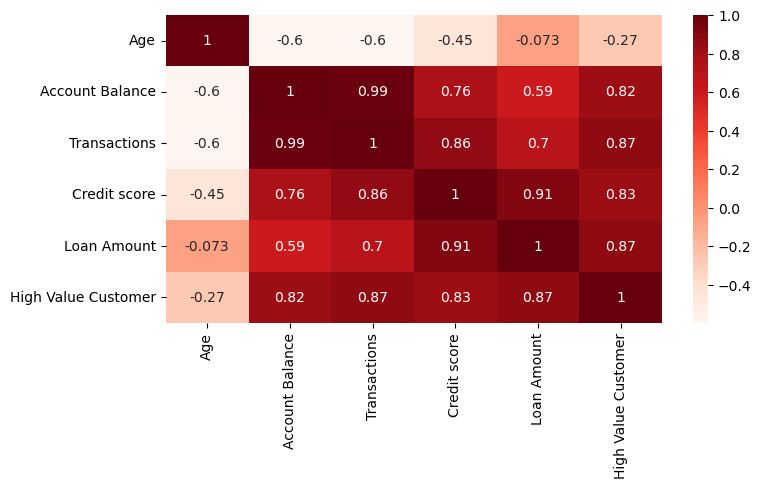

In [5]:
plt.figure(figsize=(8,4))
cor_matrix=df.corr()
sns.heatmap(cor_matrix,annot=True,cmap=plt.cm.Reds)
plt.show

In [7]:
#Correlation with output variable

cor_target=abs(cor_matrix["High Value Customer"])
print(cor_target)
relevent_features=cor_target[cor_target>0.83]
print(relevent_features)

Age                    0.272614
Account Balance        0.824876
Transactions           0.866025
Credit score           0.830116
Loan Amount            0.866025
High Value Customer    1.000000
Name: High Value Customer, dtype: float64
Transactions           0.866025
Credit score           0.830116
Loan Amount            0.866025
High Value Customer    1.000000
Name: High Value Customer, dtype: float64


In [11]:
print(df[["Transactions","Credit score"]].corr())

              Transactions  Credit score
Transactions      1.000000      0.857152
Credit score      0.857152      1.000000


In [14]:
print(df[["Transactions","Loan Amount"]].corr())

              Transactions  Loan Amount
Transactions           1.0          0.7
Loan Amount            0.7          1.0


In [15]:
print(df[["Loan Amount","Credit score"]].corr())

              Loan Amount  Credit score
Loan Amount      1.000000      0.912452
Credit score     0.912452      1.000000


In [1]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
x=df.iloc[:,:-1]
y=df.iloc[:,5]
print(x.head)
print(y.head)
model=DecisionTreeClassifier()
rfe=RFE(model,n_features_to_select=3)
fit=rfe.fit(x,y)
print("Num Features:%d"%fit.n_features_)
print("Selected Features:%s"%fit.support_)
print("Feature Ranking:%s"%fit.ranking_)

NameError: name 'df' is not defined